# Projection à partir de la série de départ:


### Les packages dont on a besoin

In [3]:
require(forecast)
require(TSA)
require(fArma)
require(smooth)
require(Mcomp)
library(ChainLadder)

### Chargement des données dont l'étude va seporter

Dans cette partie, on a eu à choisir les données, et dans notre cas, on va plutôt travailler avec un jeu de données qui s'appelle "Product Liability".

In [5]:
donne<-read.csv("/home/tantely/Documents/IMSA/Projet_TER/otherliab_pos.csv",sep=',')
OL <- donne[donne$DevelopmentYear<1998,]

PaidTri <- as.triangle(OL, origin="AccidentYear", dev="DevelopmentLag", value="CumPaidLoss")
PaidTri_non <- as.triangle(OL, origin="AccidentYear", dev="DevelopmentLag", value="NonCumPaidLoss")
#print(LossTri)
print("Paiemement cummulé")
M1=as.matrix(PaidTri)
colnames(M1)<-0:9
M1
print("Piement non cummulé")
M2=as.matrix(PaidTri_non)
colnames(M2)<-0:9
M2
donne


[1] "Paiemement cummulé"


,0,1,2,3,4,5,6,7,8,9
1988,7719,17079,32138,55930,75400,99711,101039,104617,110040,111473
1989,6387,17842,35429,57222,80791,95150,103731,112450,113114,NA
1990,8347,18022,36758,71537,87621,100813,121789,122055,NA,NA
1991,7700,21502,43272,64383,78572,93042,100276,NA,NA,NA
1992,8223,23181,37376,52041,72611,76059,NA,NA,NA,NA
1993,12122,26156,48834,82909,94462,NA,NA,NA,NA,NA
1994,7596,19404,65507,111264,NA,NA,NA,NA,NA,NA
1995,10264,44816,62018,NA,NA,NA,NA,NA,NA,NA
1996,20162,28107,NA,NA,NA,NA,NA,NA,NA,NA
1997,10682,NA,NA,NA,NA,NA,NA,NA,NA,NA


[1] "Piement non cummulé"


,0,1,2,3,4,5,6,7,8,9
1988,7719,9360,15059,23792,19470,24311,1328,3578,5423,1433
1989,6387,11455,17587,21793,23569,14359,8581,8719,664,NA
1990,8347,9675,18736,34779,16084,13192,20976,266,NA,NA
1991,7700,13802,21770,21111,14189,14470,7234,NA,NA,NA
1992,8223,14958,14195,14665,20570,3448,NA,NA,NA,NA
1993,12122,14034,22678,34075,11553,NA,NA,NA,NA,NA
1994,7596,11808,46103,45757,NA,NA,NA,NA,NA,NA
1995,10264,34552,17202,NA,NA,NA,NA,NA,NA,NA
1996,20162,7945,NA,NA,NA,NA,NA,NA,NA,NA
1997,10682,NA,NA,NA,NA,NA,NA,NA,NA,NA


X,AccidentYear,DevelopmentYear,DevelopmentLag,IncurLoss,CumPaidLoss,EarnedPremDIR,NonCumPaidLoss
1,1988,1988,1,58783,7719,273689,7719
2,1988,1989,2,53275,17079,273689,9360
3,1988,1990,3,87263,32138,273689,15059
4,1988,1991,4,102567,55930,273689,23792
5,1988,1992,5,114008,75400,273689,19470
6,1988,1993,6,120758,99711,273689,24311
7,1988,1994,7,113919,101039,273689,1328
8,1988,1995,8,117933,104617,273689,3578
9,1988,1996,9,117744,110040,273689,5423
10,1988,1997,10,122020,111473,273689,1433


In [4]:
paid_loss=donne$NonCumPaidLoss
Mat_tri<-function(X,r,date=1987){
    M=matrix(rep(0,r*r),ncol=r,nrow=r)
    ligne=1:r+date
    colonne=1:r-1
    rownames(M)=ligne
    colnames(M)=colonne
    for(i in 0:(r-1)){
       for(j in 0:(r-1)){
           if(i+j<r){
           M[i+1,j+1]=X[i*r+j+1]   
           }
       }
   }
    return(M)
}

In [5]:
Mat_tri(paid_loss,r=10)

,0,1,2,3,4,5,6,7,8,9
1988,7719,9360,15059,23792,19470,24311,1328,3578,5423,1433
1989,6387,11455,17587,21793,23569,14359,8581,8719,664,0
1990,8347,9675,18736,34779,16084,13192,20976,266,0,0
1991,7700,13802,21770,21111,14189,14470,7234,0,0,0
1992,8223,14958,14195,14665,20570,3448,0,0,0,0
1993,12122,14034,22678,34075,11553,0,0,0,0,0
1994,7596,11808,46103,45757,0,0,0,0,0,0
1995,10264,34552,17202,0,0,0,0,0,0,0
1996,20162,7945,0,0,0,0,0,0,0,0
1997,10682,0,0,0,0,0,0,0,0,0


## Modélisation en série de type additive de notre variable temporelle increase paid loss
Comme on a bien choisi notre série de données, on va maintenant essayer de construire un modèle de série temporelle qui peut s'écrire comme suite:
$$X_t= \hat{a}+\hat{b}t+S_t+\epsilon _t$$
où $\hat{a}+\hat{b}t$ corréspond à la tendance, $S_t$ la saisonnalité et $\epsilon_t$ le bruit blanc.

## Vérification de d'additivité ou multiplicativité de la série

Dans cette partie, on va vérifier si notre modèle est additif ou multiplicatif. Dans cette partie, on va alors faire le teste de Buys-Ballot. Comme le test n'est pas implémenté sur R, on va devoir la programmer.

In [6]:
buys_ballot<-function(Mat,T=100,r=10){
    N=T%/%r
    Y=matrix(rep(0,N*r),ncol=N)
    for(i in 1:r){
        for(j in 1:N){
            Y[i,j]= Mat[i+(j-1)*r]
        }
    }
    mu=c()
    sig=c()
    B=t(Y)
    for(i in 1:N){
        mu=c(mu,sum(B[i,])/r)
    }
    for(i in 1:N){
        sig= c(sig,sqrt( sum(( B[i,]- mu[i] )^2)/r)); 
    }
    return(cbind(sig,mu))
}

In [7]:
mu_sig=as.data.frame(buys_ballot(paid_loss))
reg=lm(mu_sig$sig~mu_sig$mu)
summary(reg)


Call:
lm(formula = mu_sig$sig ~ mu_sig$mu)

Residuals:
    Min      1Q  Median      3Q     Max 
-2344.0  -816.8  -206.2   221.0  3865.5 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
(Intercept) -2387.9541  3260.6984  -0.732  0.48486   
mu_sig$mu       0.8527     0.2361   3.612  0.00686 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1772 on 8 degrees of freedom
Multiple R-squared:  0.6199,	Adjusted R-squared:  0.5724 
F-statistic: 13.05 on 1 and 8 DF,  p-value: 0.006859


Comme la p_value$<5\%$ au niveau de la moyenne donc on rejette l'hypothèse que l'on a un modèle additif. Notre modèle est dans ce cas multiplicatif.

## Transformation du modèle multiplicatif en modèle additif:
Comme notre modèle est multiplicatif, donc s'écrit comme: $X_t=S_t.T_t.\epsilon_t$.
Pour faire nos études en modèle additif, on va prendre:
$$ln(X_t)=ln(S_t)+ln(T_t)+ln(\epsilon_t)$$
Et cela marche car on s'était assuré que les valeurs que prennent $X_t$ sont strictement positives.

In [8]:
paid_loss=log(paid_loss)
length(paid_loss)

[1] 100

## Estimation de la tendance
Pour pouvoir estimer la tendance, on va de ce fait utiliser le teste du signe de la différence qui va être implémentée comme suite: 

In [9]:
signe_difference<-function(vector){
  n=length(vector)
  U=rep(0,n-1)
  if(n>1){
    if(vector[2]>vector[1]){
      U[1]=1
    }
  
    for(i in 2:(n-1)){
      if(vector[i+1]>vector[i]){
        U[i]=1
      }else{
        U[i]=0
      }
    }
  }
  W=(sum(U)-(n-1)/4)/((n+1)/12)
  res=""
  if(abs(W)>1.96){
    return(list(W_stat=abs(W),commentaire="La série possède une tendance"))
  }else{
    return(list(W_stat=abs(W),commentaire="La série ne possède pas de tendance"))
  }
}

### Signification de la fonction:
Le but est de faire des testes statistiques avec hypothèse :
- $H_0$:  La série possède une tendance.
-  $H_1$:  La série ne possède pas de tendance.

Les détailles se trouvent dans les notes.

## Tester la présence de tendance :

In [10]:
signe_difference(paid_loss)

$W_stat
[1] 3.356436

$commentaire
[1] "La série possède une tendance"

### Tester la présence d'une saisonnalité:
Pour voir l'existence d'une saisonnalité dans notre série, on va regarder les courbes qui sortent des fonctions Acf, pac et le périodogramme de notre série.

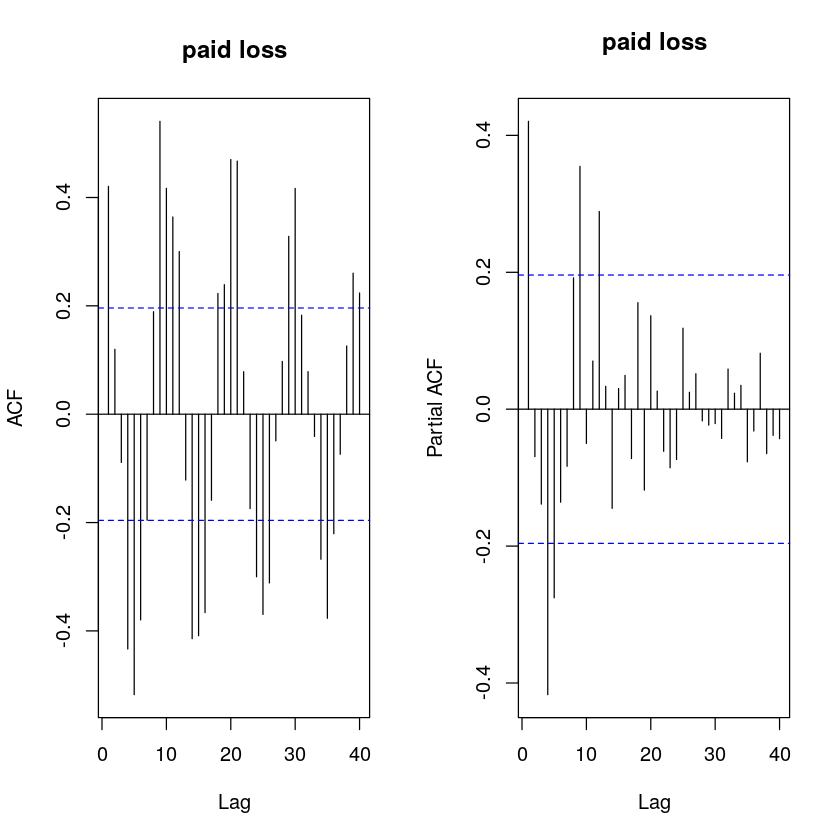

In [11]:
par(mfrow=c(1,2))
acf(paid_loss,main="paid loss",lag=40)
pacf(paid_loss,main="paid loss",lag=40)

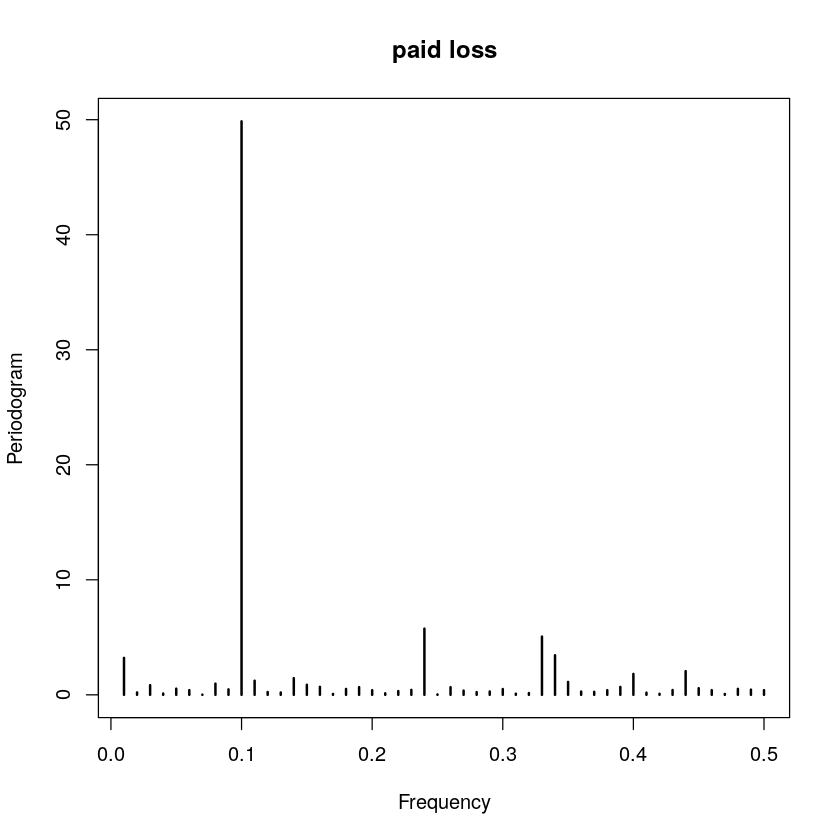

In [12]:
per=periodogram(paid_loss,main="paid loss")

### Calcul de la périodicité selon la periodogramme
Pour ce faire, on va déterminer l'indice de la séquence maximale du périodogramme qui correspond à la valeur de la périodicité: 

In [13]:
floor(length(paid_loss)/which.max(per$spec))

[1] 10

## Interprétation:
On peut en déduire à partir de ces courbes que l'on a la présence de saisonnalités dans notre série. En effet, sur la courbe du Acf par exemple, on peut remarquer l'existence d'une périodicité égale à $10$. La présence d'une pique sur le périodogramme indique aussi l'existence de la saisonnalité qui vaut d'ailleurs aussi $10$.

## Estimation avec des fonctions de R de la saisonnalité, de la tendance et les bruits:
cette partie aide juste à visualiser avec un exemple de fonction sur R lles différentes composantes de notre série.

## Remarque:
Même si sur la sortie de R la tendance n'est pas vraiment linéaire, on va tout de même supposer qu'elle l'est en suivant le modèle que l'on s'était définis ci-dessus.

In [14]:
fit.train<-paid_loss[1:80]
fit.test<-paid_loss[81:100]

## Estimation de la saisonnalité:
Dans cette partie, on va éstimer la saisonnalité en utilisant la moyenne mobile que l'on programmera ci-dessous:

In [15]:
Moyenne_mobile<-function(X,t,Ta=12,da=4){
  if((t<=da%/%2)|(t>Ta-da%/%2)){
    return(0)
  }
  coeff=c()
  q=da%/%2
  
  #Cas où d est impaire
  if(da%%2==1){
    coeff=rep(1/da,2*q+1)
  }else{ # Sinon d est paire
    for(j in -q:q){
      if(abs(j)==q){
        coeff=c(coeff,1/(4*q))
      }else{
        coeff=c(coeff,1/(2*q))
      }
    }
  }
  res=rep(0,2*q+1)
  for(i in -q:q){
     res[i+q+1]=coeff[i+q+1]*X[t-i]
   }
  return(sum(res))
}

Maintenant on va à partir de cette fonction implémenter une fonction qui va calculer la saisonnalité:

In [16]:
saison2_fontion<-function(vect,T=12,d=4){
  J=T%/%d-1
  X<-vect
  W=rep(0,d)
  S1=rep(0,d)
  # Application de la formule 
  for(k in 1:d){
    temp=0
    for(j in 0:J){
      temp=temp+X[k+d*j]-Moyenne_mobile(X,t=k+d*j,Ta=T,da=d)
    }
    W[k]=temp/J
  }
  
  S1=W-sum(W)/d
  # Condition qui nous permet d'avoir la somme des saisons S_k égale à 0.
  S1=S1-sum(S1)/d
  res=c()
  #On repete (T/d) fois la tendance.
  for(i in 1:(T/d)){
    res=c(res,S1)
  }
    return(res)
}

## Test sur notre jeu de donnée:

In [17]:
saison=saison2_fontion(fit.train,T=80,d=10)

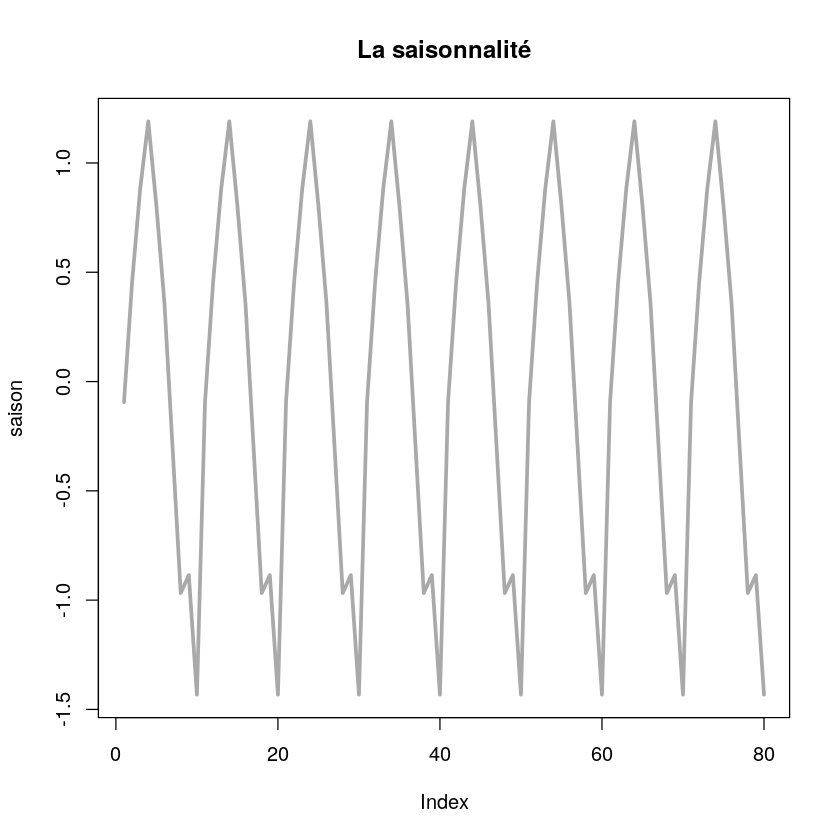

In [18]:
plot(saison,col="darkgrey",main="La saisonnalité",type="l",lwd=3)

## Remarque:
En comparant l'allure de cette courbe avec celui obtenue via R, on remarque bien qu'ils ont les mêmes allures et caractéristiques

## Estimation de la tendance:
Pour l'estimation de la tendance, pour obtenir les coéfficients, on va se baser sur le méthode des moindres carrés en une dimension, donc utiliser la fonction lm de R pour effectuer cela:

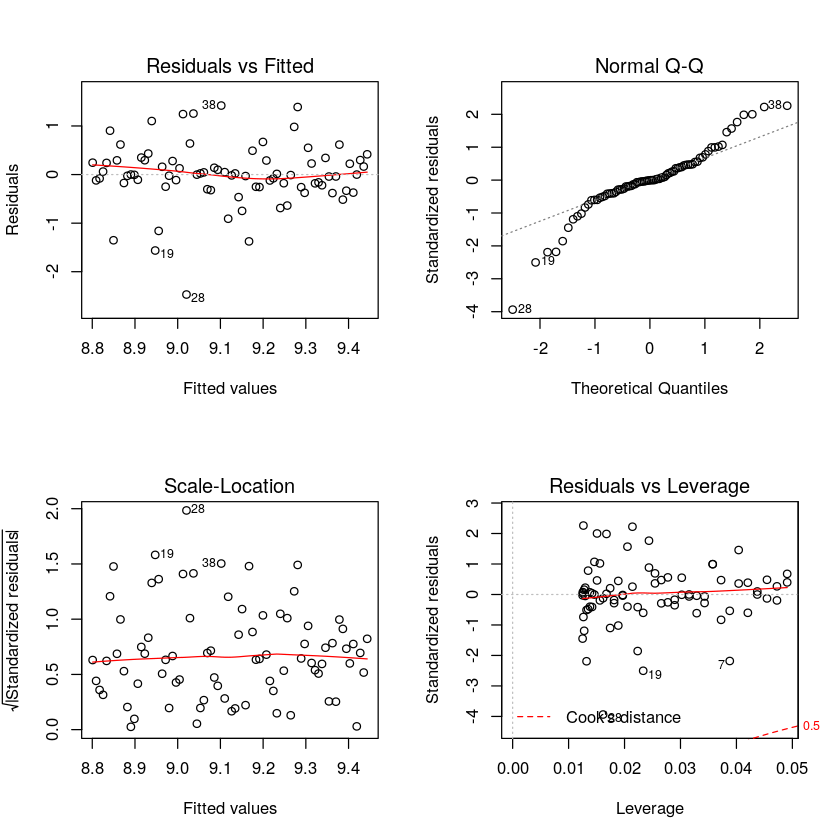

In [19]:
X_mod=fit.train-saison
lm.res<-lm(X_mod~time(fit.train))
#summary(lm.res)
par(mfrow=c(2,2))
plot(lm.res)

In [20]:
summary(lm.res)


Call:
lm(formula = X_mod ~ time(fit.train))

Residuals:
     Min       1Q   Median       3Q      Max 
-2.46929 -0.25030 -0.00385  0.29009  1.42043 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)     8.792775   0.142696  61.619  < 2e-16 ***
time(fit.train) 0.008136   0.003061   2.658  0.00953 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6322 on 78 degrees of freedom
Multiple R-squared:  0.08305,	Adjusted R-squared:  0.0713 
F-statistic: 7.065 on 1 and 78 DF,  p-value: 0.009532


### Interprétation:
Comme on peut le voir le p-value nous permet de dire que le modèle est significative, mais le seul souci est la valeur de R-squared qui n'est pas proche de 1. Donc les points ne sont pas proportionnel mais dispèrsés.

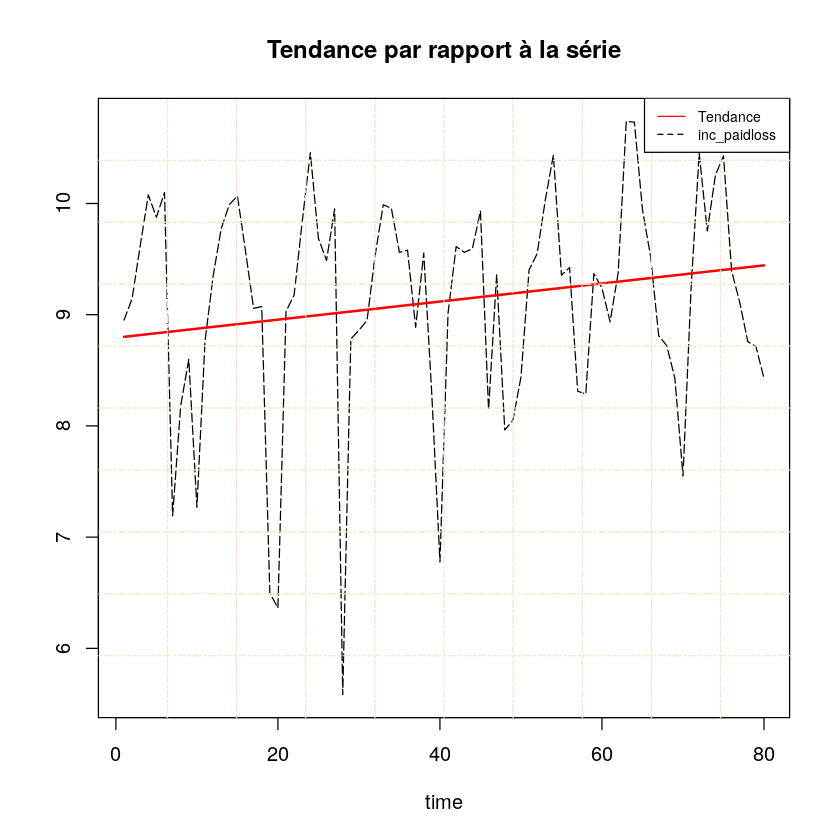

In [21]:
a_d=lm.res$coefficients[1]
b_d=lm.res$coefficients[2]
U=b_d*(time(fit.train))+a_d
plot((time(fit.train)),fit.train,type="l",lty=5,xlab="time",ylab="",main="Tendance par rapport à la série")
points(U,type="l",lwd=2,col="red")
grid (10,10, lty = 6, col = "cornsilk2")
legend("topright",c("Tendance","inc_paidloss"),col=c("red","black"),lty=c(1,2),cex=0.7)

## Estimation du bruit:
Pour l'estimation du bruit par un ARMA, et pour cela on va utiliser la fonction auto.arima du package forecast de R sur la variable:
$$\epsilon_t = X_t - \left(\hat{a}+\hat{b}t+S_t \right)$$

In [22]:
a_h=lm.res$coefficients[1]
b_h=lm.res$coefficients[2]
res_tend=lm.res$residuals
U=b_h*time(fit.train)+a_h
Eps=fit.train-(U+saison)

## Teste de stationnarité
Nous allons dans cette partie utilier le test de "Phillips-Perron" d'une part et de "Dickey-Fuller" d'autre part pour déterminer l'existance de la stationnarité de notre série temporelle. 

In [23]:
pp.test(Eps)#with unit root
adf.test(Eps)

Warning message in pp.test(Eps):
“p-value smaller than printed p-value”


	Phillips-Perron Unit Root Test

data:  Eps
Dickey-Fuller Z(alpha) = -78.657, Truncation lag parameter = 3, p-value
= 0.01
alternative hypothesis: stationary


Warning message in adf.test(Eps):
“p-value smaller than printed p-value”


	Augmented Dickey-Fuller Test

data:  Eps
Dickey-Fuller = -4.8491, Lag order = 4, p-value = 0.01
alternative hypothesis: stationary


On remarque que les p-value sont inférieurs à $5\%$ dans les deux tests, donc on rejette l'hypothèse $H_0$ et on accepte l'hypothèse alternative de la stationnarité de notre bruit.

### Modélisation du bruit selon le critère akaik, et bic

In [39]:
arma<-auto.arima(Eps)
arma

Series: Eps 
ARIMA(0,0,0) with zero mean 

sigma^2 estimated as 0.3897:  log likelihood=-75.82
AIC=153.63   AICc=153.68   BIC=156.01

In [38]:
pred0=forecast(arma,h=20)
temp=pred0$mean+saison[1:20]+b_h*time(pred0$mean)+a_h
mean((exp(temp)-exp(fit.test))^2)

[1] 54414317

  ## Vérification :
  ### Test du modèle MA(1):
  En premier lieu, on va s'assurer que nous avons bien un $MA(1)$ comme bruit de notre série en utilisant la fonction $armaFit$ du package $fArma$/

In [26]:
Box.test(arma$residuals)


	Box-Pierce test

data:  arma$residuals
X-squared = 1.0915, df = 1, p-value = 0.2961


### Comparaison avec d'autres modélisation ARMA
Dans cette partie, on veut voir les autres possibilités de modélisation du bruit.
Pour cela on ne va pas se baser que sur les critères akaik et le critère de Schwarz.
On va aussi essayer d'optimiser selon la valeur du mean square Error(MSE) par exemple.

In [27]:
#A=armaFit(formula=~arma(0,1),data=Eps,method = "CSS")
E_m0=arima(Eps,order=c(0,0,0))
E_m1=arima(Eps,order = c(0,0,1))
E_m2=arima(Eps,order=c(1,0,1))
E_m3=arima(Eps,order=c(2,0,1))
E_m4=arima(Eps,order=c(1,0,0))
E_m5=arima(Eps,order=c(1,0,2))

In [28]:
Box.test(E_m0$residuals,type=c("Ljung-Box"))
Box.test(E_m1$residuals,type=c("Ljung-Box"))
Box.test(E_m2$residuals,type=c("Ljung-Box"))
Box.test(E_m3$residuals,type=c("Ljung-Box"))
Box.test(E_m4$residuals,type=c("Ljung-Box"))
Box.test(E_m5$residuals,type=c("Ljung-Box"))
Ljung_Box<-c(0.2769,0.9856,0.9834, 0.921,0.6594, 0.8462)


	Box-Ljung test

data:  E_m0$residuals
X-squared = 1.133, df = 1, p-value = 0.2871



	Box-Ljung test

data:  E_m1$residuals
X-squared = 0.14317, df = 1, p-value = 0.7052



	Box-Ljung test

data:  E_m2$residuals
X-squared = 0.020918, df = 1, p-value = 0.885



	Box-Ljung test

data:  E_m3$residuals
X-squared = 0.0021885, df = 1, p-value = 0.9627



	Box-Ljung test

data:  E_m4$residuals
X-squared = 0.077765, df = 1, p-value = 0.7803



	Box-Ljung test

data:  E_m5$residuals
X-squared = 0.0063698, df = 1, p-value = 0.9364


In [40]:
akaik<-c(arma$aic,E_m1$aic,E_m2$aic,E_m3$aic,E_m4$aic,E_m5$aic)

In [41]:
bic<-c(BIC(arma),BIC(E_m1),BIC(E_m2),BIC(E_m3),BIC(E_m4),BIC(E_m5))
p_q<-c("(0,0)","(0,1)","(1,1)","(2,1)","(1,0)","(1,2)")
test=forecast(arma,h=20)

In [42]:
pred0<-predict(E_m0,n.ahead=20)
pred1<-predict(E_m1,n.ahead =20)
pred2<-predict(E_m2,n.ahead =20)
pred3<-predict(E_m3,n.ahead =20)
pred4<-predict(E_m4,n.ahead =20)
pred5<-predict(E_m5,n.ahead =20)
X_pred0=pred0$pred+saison[1:20]+b_h*time(81:100)+a_h
X_pred1=pred1$pred+saison[1:20]+b_h*time(81:100)+a_h
X_pred2=pred2$pred+saison[1:20]+b_h*time(81:100)+a_h
X_pred3=pred3$pred+saison[1:20]+b_h*time(81:100)+a_h
X_pred4=pred4$pred+saison[1:20]+b_h*time(81:100)+a_h
X_pred5=pred5$pred+saison[1:20]+b_h*time(81:100)+a_h
MSE0<-mean((exp(X_pred0)-exp(fit.test))^2)
MSE1<-mean((exp(X_pred1)-exp(fit.test))^2)
MSE2<-mean((exp(X_pred2)-exp(fit.test))^2)
MSE3<-mean((exp(X_pred3)-exp(fit.test))^2)
MSE4<-mean((exp(X_pred4)-exp(fit.test))^2)
MSE5<-mean((exp(X_pred5)-exp(fit.test))^2)
MSE<-c(MSE0,MSE1,MSE2,MSE3,MSE4,MSE5)

F_m1=ets(Eps)
F_m1

In [45]:
tableau<-cbind(p_q,Ljung_Box,akaik,bic,MSE)
tableau

p_q,Ljung_Box,akaik,bic,MSE
"(0,0)",0.2769,153.631875188762,156.013901823435,65969603.8723603
"(0,1)",0.9856,153.608016726993,162.754096631015,67031512.8499151
"(1,1)",0.9834,147.888079411645,159.41618595034,73516552.2067507
"(2,1)",0.921,152.693678992377,166.603812165746,66172536.000747
"(1,0)",0.6594,154.538055941568,163.684135845589,66521369.6918472
"(1,2)",0.8462,151.72747867171,165.637611845079,67203205.6650229


### Interpretation du tableau:
Au niveau du test Ljung-Box, on a bien la validité des modèles $ARMA(p,q)$ que l'on a choisi. Et conscernant les critères de Schwarz et du AKAIK, on a bien pour le choix du modèle un $ARMA(0,0)$ qui minimise plus le BIC par rapport à d'autre modèles. Mais si on veut plus un modèle qui minimise le MSE, on doit choisir un $ARMA(2,1)$
comme on peut le voir dans le tableau ci-dessus.

## Résumé du modèle choisit selon la minimisation du BIC et du AIC:
On va mettre dans un tableau récapitulatif l'ensemble des résultats qu'on a pu avoir pour nos série de donnée:

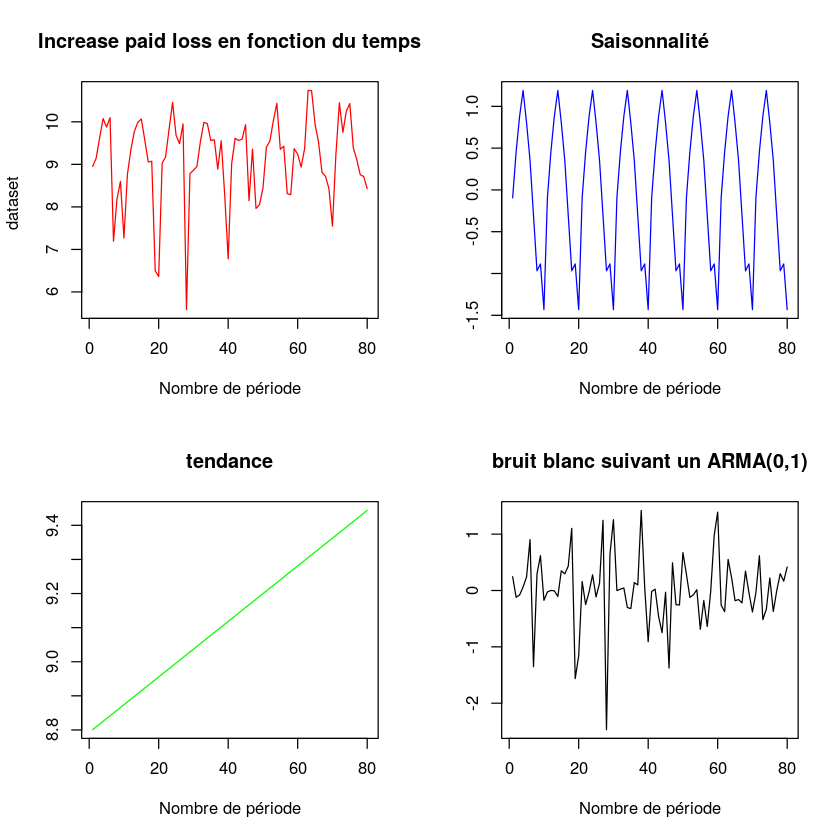

In [46]:
temp<-time(fit.train)
par(mfrow=c(2,2))
plot(temp,(fit.train),main="Increase paid loss en fonction du temps",
     xlab="Nombre de période",ylab="dataset ",type="l",col="red")
plot(temp,saison,col="blue",main="Saisonnalité",xlab="Nombre de période",ylab="",type="l")
plot(temp,U,col="green",main="tendance",xlab="Nombre de période",ylab="",type="l")
plot(temp,arma$x,type="l",main="bruit blanc suivant un ARMA(0,1)",xlab="Nombre de période",ylab="")

### Prediction, visualisation (critère AIC,BIC):

In [47]:
del=sqrt(var(X_pred0))*1.96
del

[1] 1.655995

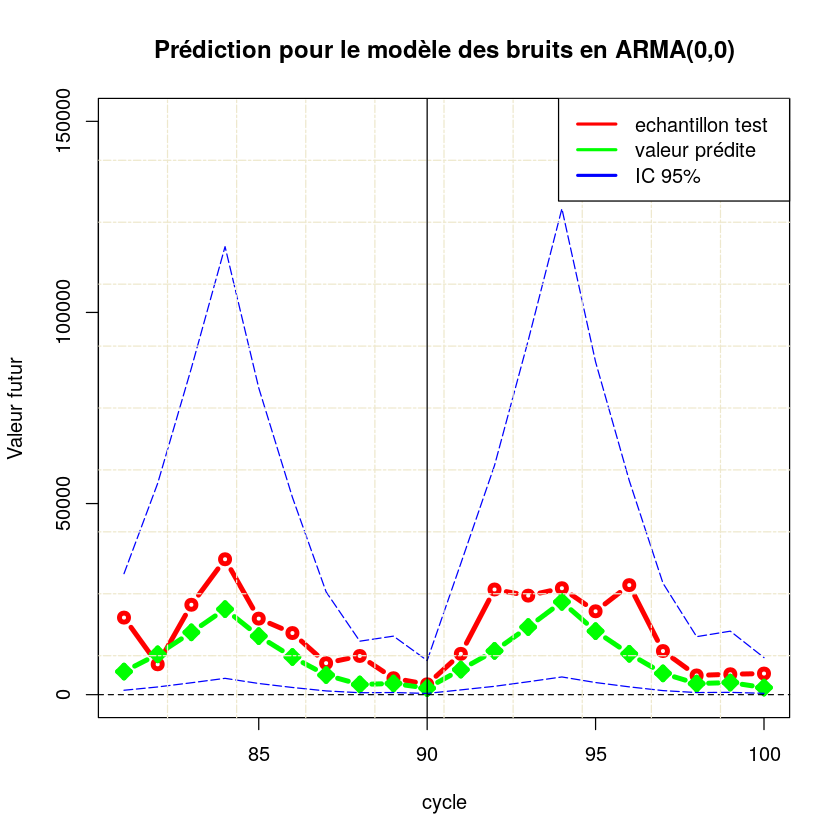

In [48]:
plot(time(fit.test)+length(fit.train),exp(fit.test),col="red",type="b",lwd=4,xlab="cycle",ylab="Valeur futur",
    main="Prédiction pour le modèle des bruits en ARMA(0,0)",ylim=c(0,150000))
points(time(fit.test)+length(fit.train),exp(X_pred0),type="b",lwd=4,pch=9,col="green")
points(time(fit.test)+length(fit.train),exp(X_pred0-del),type="l",lty=5,col="blue")
points(time(fit.test)+length(fit.train),exp(X_pred0+del),type="l",lty=5,col="blue")
abline(h=0,lty=8)
grid (10,10, lty = 6, col = "cornsilk2")
abline(v=90,lty=1,pch=9)
legend("topright",c("echantillon test","valeur prédite","IC 95%"),col=c("red","green","blue"),lty=c(1,1),lwd=c(2.5,2.5))

## Résumé du modèle choisit selon la minisation de la MSE:
Ici on va prendre la modélisation $ARMA(p,q)$ des bruits $\epsilon_t$ qui minimise la MSE .

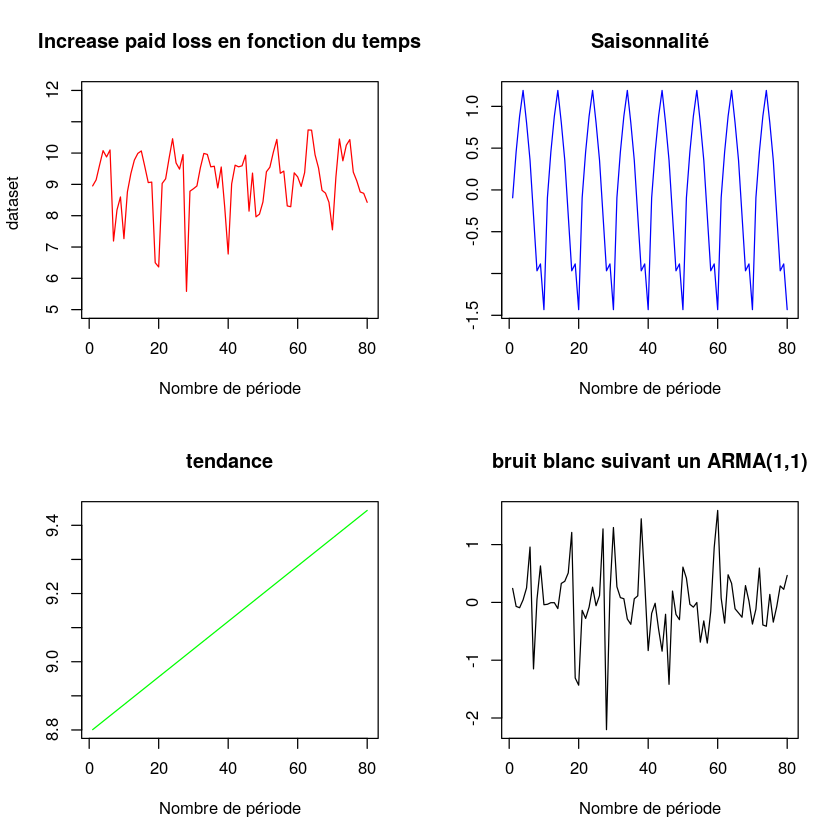

In [49]:
temp<-time(fit.train)
par(mfrow=c(2,2))
plot(temp,fit.train,main="Increase paid loss en fonction du temps",
     xlab="Nombre de période",ylab="dataset ",type="l",col="red",ylim=c(5,12))
plot(temp,saison,col="blue",main="Saisonnalité",xlab="Nombre de période",ylab="",type="l")
plot(temp,U,col="green",main="tendance",xlab="Nombre de période",ylab="",type="l")
plot(temp,E_m1$residuals,type="l",main="bruit blanc suivant un ARMA(1,1)",xlab="Nombre de période",ylab="")

### Prediction, visualisation (critère MSE)

In [50]:
D=sqrt(var(X_pred1))*1.96

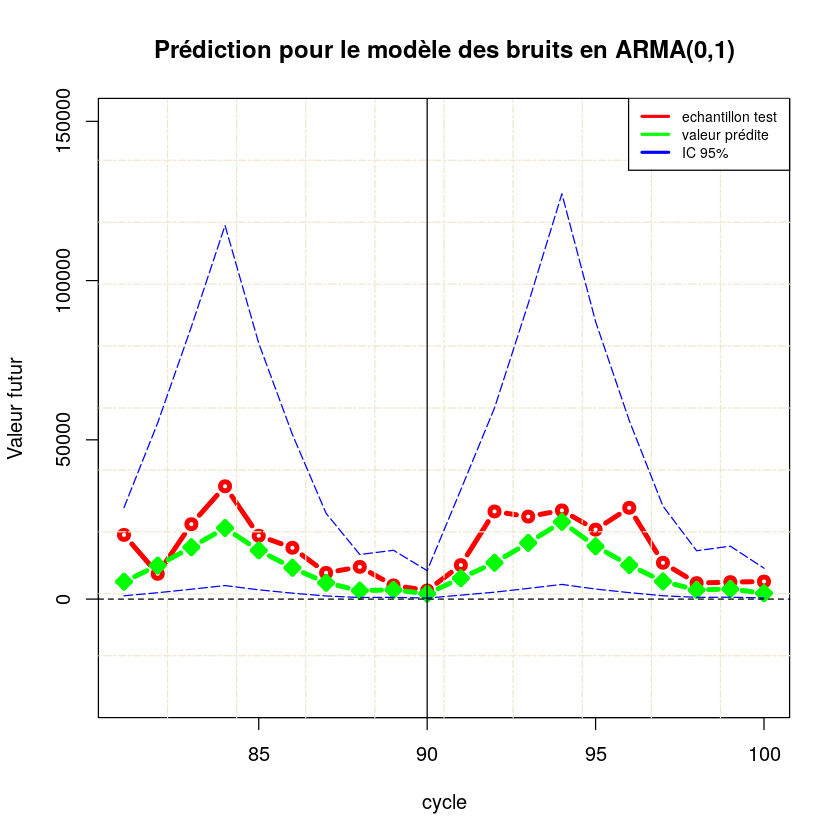

In [51]:
plot(time(fit.test)+80,exp(fit.test),col="red",type="b",lwd=4,xlab="cycle",ylab="Valeur futur",
    main="Prédiction pour le modèle des bruits en ARMA(0,1)",ylim=c(-30000,150000))
grid (10,10, lty = 6, col = "cornsilk2")
points(exp(X_pred1),type="b",lwd=4,pch=9,col="green")
points(exp(X_pred1+D),type="l",lty=5,col="blue")
points(exp(X_pred1-D),type="l",lty=5,col="blue")
abline(h=0,lty=8)
abline(v=90,lty=1,pch=9)
legend("topright",c("echantillon test","valeur prédite","IC 95%"),col=c("red","green","blue"),lty=c(1,1),lwd=c(2.5,2.5),cex=0.7)

# Triangle de paiement 1995 à 2000
En se basant sur les historiques de paiement annuels de 1988 à 1997, on va éssayer de construire le tableau de paiement (parite supérieur) en se basant sur la projection additif de notre série temporelle. Pour cela, on doit alors éstimer avec notre méthode les paiements de 1998 et 2000. 

In [52]:
paid_loss=donne$NonCumPaidLoss
n_saison=saison2_fontion(paid_loss,T=100,d=10)

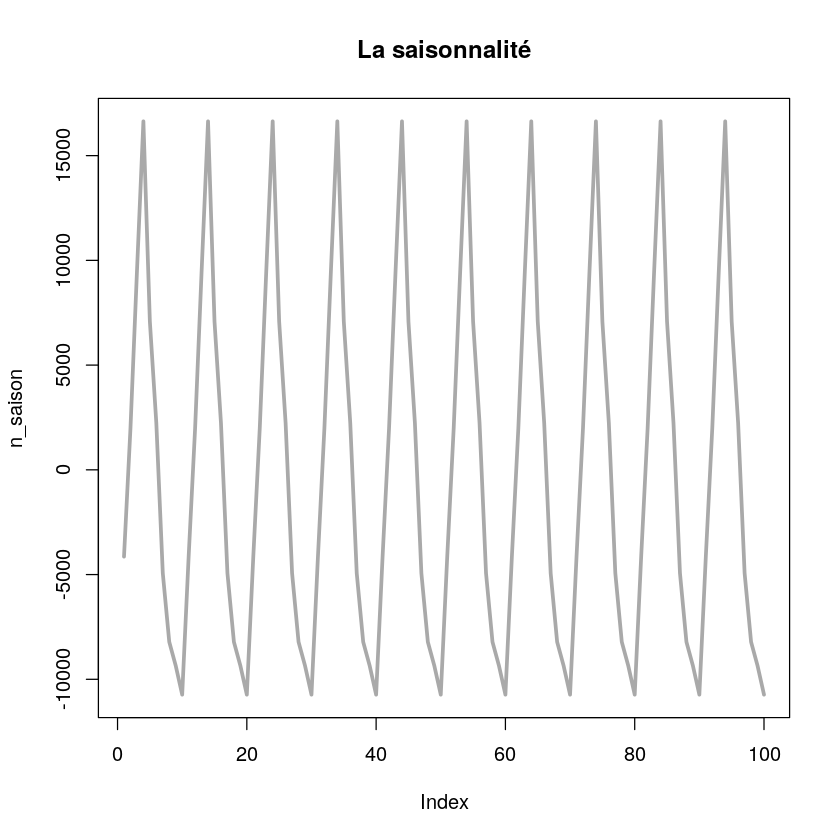

In [53]:
plot(n_saison,col="darkgrey",main="La saisonnalité",type="l",lwd=3)

## La tendance

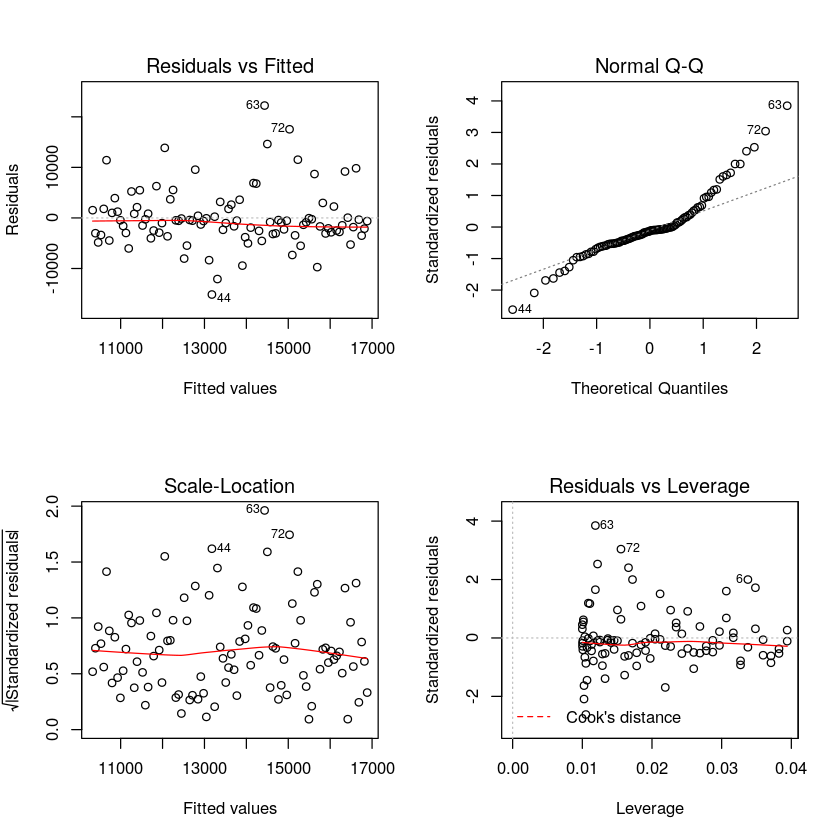

In [54]:
X_mod1=paid_loss-n_saison
lm.res1<-lm(X_mod1~time(paid_loss))
#summary(lm.res)
par(mfrow=c(2,2))
plot(lm.res1)

In [55]:
summary(lm.res1)


Call:
lm(formula = X_mod1 ~ time(paid_loss))

Residuals:
     Min       1Q   Median       3Q      Max 
-15151.0  -2991.2   -721.7   1783.8  22227.5 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)     10265.72    1171.11   8.766 5.74e-14 ***
time(paid_loss)    66.18      20.13   3.287  0.00141 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5812 on 98 degrees of freedom
Multiple R-squared:  0.0993,	Adjusted R-squared:  0.09011 
F-statistic:  10.8 on 1 and 98 DF,  p-value: 0.001406


On a bien une tendance linéaire significative.

## Estimation du bruit:

In [56]:
Yt=lm.res1$coefficients[1]+lm.res1$coefficients[2]*time(paid_loss)
bruit=paid_loss-(Yt+n_saison)

In [57]:
arma1=auto.arima(bruit)
arma1

Series: bruit 
ARIMA(0,0,0) with zero mean 

sigma^2 estimated as 33100165:  log likelihood=-1007.65
AIC=2017.29   AICc=2017.33   BIC=2019.9

In [58]:
Box.test(arma1$residuals)


	Box-Pierce test

data:  arma1$residuals
X-squared = 0.0053155, df = 1, p-value = 0.9419


In [59]:
bruit_pred=forecast(arma1,h=21)

In [60]:
Yh=lm.res1$coefficients[1]+lm.res1$coefficients[2]*(101:121)
S=n_saison[1:21]
res_pred=S+bruit_pred$mean+Yh

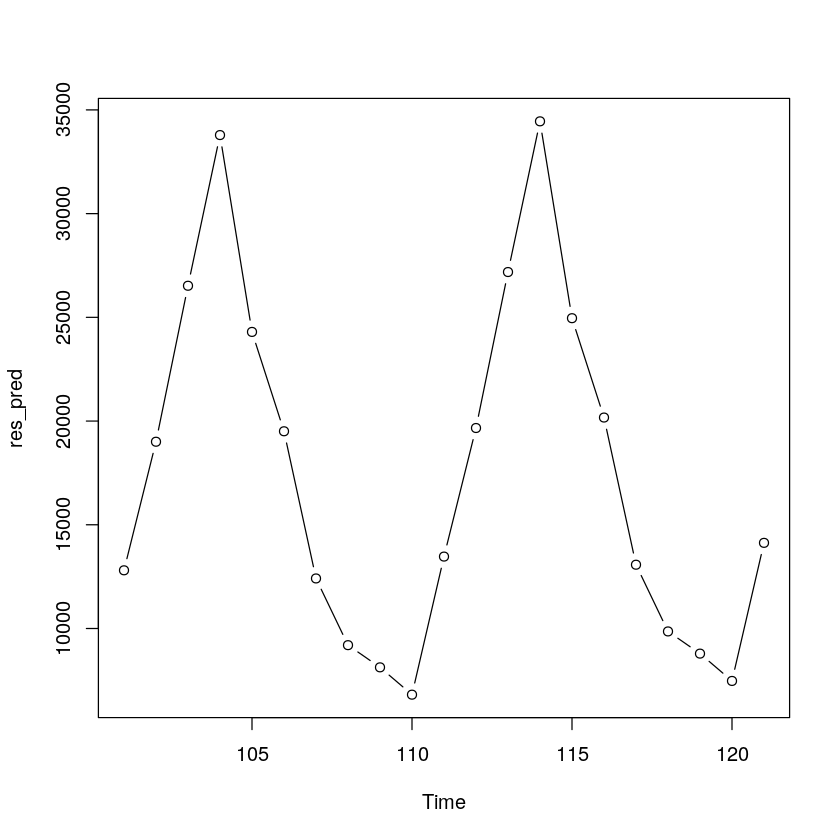

In [61]:
plot(res_pred,type="b")

In [62]:
int1=c(71:76,81:86,91:96)
int2=c(1:6,11:16,21)
New_val=c(paid_loss[int1],res_pred[int2],rep(0,5))

In [63]:
Mat_res=Mat_tri(New_val,r=6,date = 1994)
Mat_res[Mat_res==0]=NA
Mat_res

,0,1,2,3,4,5
1995,10264.00,34552.00,17202.00,28358,33830,12011
1996,20162.00,7945.00,23519.00,35428,19897,NA
1997,10682.00,27519.00,25911.00,27852,NA,NA
1998,12805.83,19003.58,26522.56,NA,NA,NA
1999,13467.60,19665.35,NA,NA,NA,NA
2000,14129.37,NA,NA,NA,NA,NA
